# HANC with a Welfare State

In [ ]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize
from scipy.optimize import minimize_scalar
import copy
from copy import deepcopy

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANCWelfareModel import HANCWelfareModelClass
from steady_state import obj_ss

from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import func


# Part I: Setting up and testing the model

In [ ]:
# If new_output = True, all figures and tables will be exported
new_output = False

model = HANCWelfareModelClass(name='baseline')

par = model.par
ss = model.ss
sol = model.sol
path = model.path

In [ ]:
ss.r = 0.02*(1-0.1)
ss.wt = 1.00*(1-0.3)
ss.S = 0.0
ss.Chi = 0.1
ss.G = 0.4

model.solve_hh_ss(do_print=True)
model.simulate_hh_ss(do_print=True)

In [ ]:
par.Chi_ = 0.0
par.G_ = 0.0
model.find_ss(do_print=True)

In [ ]:
model.test_path(in_place=True) 
model.compute_jacs(do_print=True)

# Part II Question answers

### A Stationary Equalibrium without gov 

In [ ]:
ss_res = {}

**A.1: Finding SS**

In [ ]:
par.G_ = 0.0
par.Chi_ = 0.0
model.find_ss(do_print=False)

In [ ]:
ss_res['Model A'] = func.table_ss(model)

**A.2: Ploting - Policy function**

In [ ]:
func.plot_policy(model, new_output=new_output)

**A.3: Ploting - Distribution in SS**

In [ ]:
func.plot_cdf(model, new_output=new_output)

**A.4: Ploting - Expected discounted utility**

In [ ]:
func.plot_utility(model, new_output= new_output)

# B. Optimal welfare policies 1 (no transfers)

In [ ]:
table_res = {}

In [ ]:
result_b = minimize_scalar(func.u_gov, bounds=(0.36, 0.475), method='bounded', args=(model))

func.u_gov(result_b.x, model)


ss_res['Model B'] = func.table_ss(model)

x_ = [result_b.x, 0.0]
table_res['Model B'] = func.table_extra(x_,model)

In [ ]:
chi_results = {}

In [ ]:
chi_results['Model B'] = func.calc_chi(0.0, model, lists=True)

In [ ]:
print(f'G \/ Gamma at optimal level of government production')
print(chi_results['Model B']['Y_G_relatio'])

In [ ]:
func.plot_chi(model, chi_results, new_output, chi0=True)


# C. Find optimal welfare policies II (with transfers)

**C.1: Optimal level $\chi$ an government production**

In [ ]:
x0 =[0.4, -0.2]

result_c = optimize.minimize(func.u_gov_chi, x0, method='Nelder-Mead', args=model)

func.u_gov_chi(result_c.x, model)

ss_res['Model C'] = func.table_ss(model)
table_res['Model C'] = func.table_extra(result_c.x,model)

**C.2: Plots**

In [ ]:
#data 
chi_values = [-0.35, -0.2, -0.3, -0.25, -0.2, -0.22, -0.15, -0.1, -0.05, 0.0, 0.05]  # List of chi values to compute
opt_u_values = []

# Additional Chi values for plotting 
for chi in chi_values:
    chi_results[str(chi)] = func.calc_chi(chi, model, lists=True)

for i in chi_values:
        opt_u_values.append(chi_results[str(i)]['U_opt'])

In [ ]:
func.plot_chi_u(chi_values, opt_u_values, new_output)

Figure wil be added

# D. Increased TFP 

In [41]:
#Copy the steady state values
ini_ = model.ss.__dict__.copy()

model2 = deepcopy(model)
model2.par.G_ = 0.4653
model2.par.Chi_ = -0.2477

model2.par.Gamma_G_ = 1.0
model2.par.Gamma_Y_ = 1.1
model2.find_ss()

In [42]:
x0 =[0.4, -0.2]

result_d = optimize.minimize(func.u_gov_chi, x0, method='Nelder-Mead', args=model2)

func.u_gov_chi(result_d.x, model2)

ss_res['Model D'] = func.table_ss(model2)
table_res['Model D'] = func.table_extra(result_d.x,model2)

shocks: G L_G Gamma_Y Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi              0.0e+00
 S                0.0e+00
hh
 A_hh             8.2e-10
 C_hh             1.9e-11
 ELL_hh           6.3e-11
 L_hh             5.1e-11
 INC_hh           1.6e-11
 U_hh             1.3e-10
blocks.market_clearing
 L                5.1e-11
 I                2.2e-16
 clearing_A       8.2e-10 [target]
 clearing_L       5.1e-11
 clearing_Y       1.9e-11
 clearing_G       2.7e-11 [target]
shocks: G L_G Gamma_Y Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi      

# E. Transition Path 

In [70]:
table_res['Model D']


,Value
Variable,
Chi_val,-0.248
Gov_opt,0.465
Gamma_Y,1.100
U_opt,-128.840
Y_G_relatio,0.311


In [97]:
# a. define shock

# model3.find_transition_path(shocks=[], ini=ini_)

AttributeError: 'function' object has no attribute 'ss'

In [116]:
# a. define shock
model3 = deepcopy(model2)

par.T_n = 10
dG = np.zeros(par.T)

#for t in range(par.T_n):
#    dG[t] = (model2.ss.G - 0.465)**(-t)
dG[:4] = 0.02

dL_G = np.zeros(par.T)
dL_G[:4] = 0.02
#dL_G[:4] = 0.01

shocks = {'dG':dG, 'dL_G' : dL_G} # note the 'd' for difference (in absolute terms)

model2.find_transition_path(shocks=[], ini=ini_)
model3.find_transition_path(shocks=shocks, ini=ini_)

Text(0.5, 1.0, 'Private production')

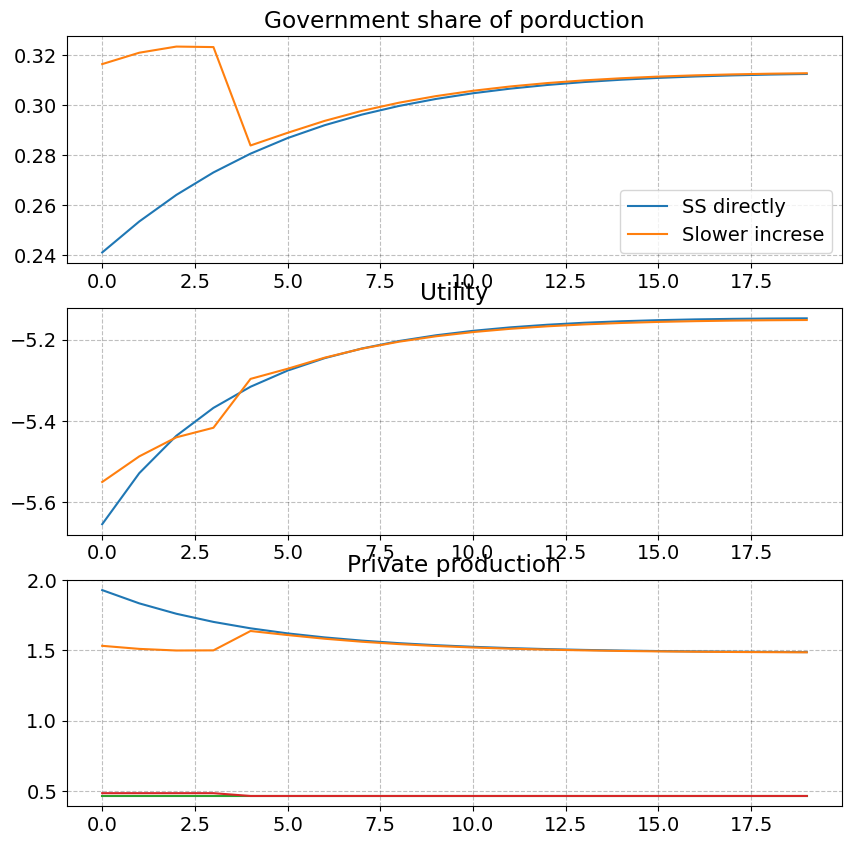

In [123]:
plot_len = 20

fig = plt.figure(figsize=(10, 10), dpi=100)
ax1 = fig.add_subplot(3,1, 1)

ax1.plot(model2.path.G[:plot_len]/model2.path.Y[:plot_len], label = 'SS directly')
ax1.plot(model3.path.G[:plot_len]/model3.path.Y[:plot_len], label = 'Slower increse')
ax1.set_title('Government share of porduction')
ax1.legend()

ax2 = fig.add_subplot(3,1,2)
ax2.plot(model2.path.U_hh[:plot_len])
ax2.plot(model3.path.U_hh[:plot_len])
ax2.set_title('Utility')

ax3 = fig.add_subplot(3,1,3)
ax3.plot(model2.path.Y[:plot_len])
ax3.plot(model3.path.Y[:plot_len])
ax3.plot(model2.path.G[:plot_len])
ax3.plot(model3.path.G[:plot_len])
ax3.set_title('Private production')

